# ALDI an Oasis in Food Desserts

#### Caveats
1. Table of content anchors do not work on GitHub
2. IBM cognitiveclass jupyterlab does require additional imports 
3. Two ways of displaying folium maps are used hopefully one will work on your system
4. nnotebookviewer: https://nbviewer.jupyter.org/github/henryjos/Battle-of-Neighborhoods/blob/master/Battle-of-Neighborhoods.ipynb

## Table of Contents
1. [Introduction](#Introduction)
    1. [Import Necessary Libraries](#ImportNecessaryLibraries)
    2. [Import Chicago Shapefile ](#ImportChicago)
    3. [Import Chicago Neighborhood Map](#ImportNeighborhood)
2. [Download Food Access Data](#DownloadFoodAccess)
    1. [Determine Chicago limited food access neighborhoods](#Chicagolimitedfoodaccessneigborhoods)
    2. [Combine Chicago Neighborhood Map and Census Map](#CombineChicagoNeighborhoodMapandCensusMap)
    3. [Isolate Chicago's limited food access neighborhoods](#IsolateChicagoslimitedfoodaccessneighborhoods)
    4. [Plot 2015 food desert census tracts in Chicago Neighborhoods where family income is 26000 to 44000](#Plot2015fooddesertcensustractsinChicagoNeighborhoods)
    5. [Find the centroid of the food desert census tracks in each neighborhood](#Findthecentroidofthefooddesertcensustracksineachneighborhood)
3. [Let us find Chicago's ALDI](#LetusfindChicago'sALDI)
    1. [Now lets find the ALDI, that are within 1/2  mile from centroid of a food desert neighborhood](#NowletsfindtheALDIthatarewithin1/2mile)
4. [Foursquare and Folium view of ALDI in Chicago](#FoursquareandFoliumviewofALDIinChicago)
    1. [Get ALDI's as Supermarket Venues in Food Deserts](#GetALDI'sasSupermarketVenuesinFoodDeserts)  
    2. [Get ALDI's Tips in Food Deserts](#GetALDI'sTipsinFoodDeserts)
5. [Maps](#Maps)    
    1. [Maps with TIPS](#MapswithTips)
    2. [Maps Showing possible locations of other food desert ALDI's](#MapsShowingpossiblelocationsofotherfooddesertALDI's)

## Introduction <a class = "anchor" id = "Introduction"></a>

In this project we will explore ALDI's expansion into "Food Deserts" in the City of Chicago. The food deserts were based on the 2010 census. Since that census ALDI's has placed supermarkets in Chicago neighborhoods that contained food deserts. The stores introduced since 2010 make the area no longer a food desert by definition in that a food desert does not contain a supermarket which ALDI is.

The Chicago shape files and the Chicago neighborhood files are on the  https://data.cityofchicago.org website

### Import Necessary Libraries<a name = "anchor" id = "ImportNecessaryLibraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import folium
from IPython.display import display
import xlrd 

### Import Chicago Shapefile<a name = "anchor" id = "ImportChicago"></a>

In [2]:
url = "https://data.cityofchicago.org/api/geospatial/ewy2-6yfk?method=export&format=Shapefile"
Chicago_shape = gpd.read_file(url)
Chicago_shape

,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1.0,6.450277e+09,845282.931362,"MULTIPOLYGON (((-87.93514 42.00089, -87.93521 ..."


Text(0.5, 1, 'Chicago Shapefile')

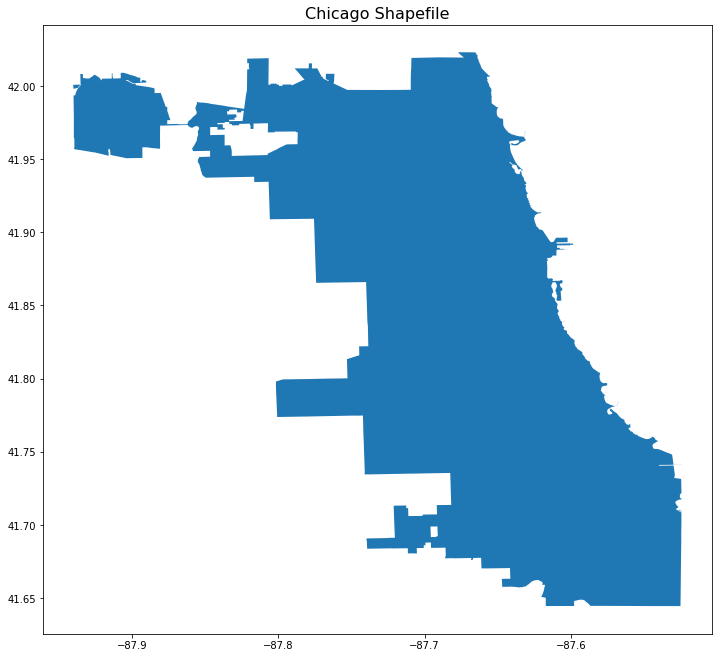

In [3]:
f, ax = plt.subplots(1, figsize=(12,12))
Chicago_shape.plot(ax=ax)
#f.suptitle('CHICAGO', fontsize=16)
plt.title(label='Chicago Shapefile', fontsize=16)

In [4]:
Chicago_shape.total_bounds 

array([-87.94011408,  41.64454312, -87.5241371 ,  42.02303859])

In [5]:
# Get the center
Chicago_shape.centroid
# need to put latitude 41.83...first

0    POINT (-87.68665 41.83772)
dtype: geometry

### Import Chicago Neighborhood Map<a name = "anchor" id = "ImportNeighborhood"></a>

In [6]:
url = "https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=Shapefile" #community areas
#urlnh = "https://data.cityofchicago.org/api/geospatial/bbvz-uum9?method=export&format=Shapefile" #neighborhoods
neighbor_boundary = gpd.read_file(url)

In [7]:
display(neighbor_boundary.head())

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [8]:
neighbor_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
area          77 non-null float64
area_num_1    77 non-null object
area_numbe    77 non-null object
comarea       77 non-null float64
comarea_id    77 non-null float64
community     77 non-null object
perimeter     77 non-null float64
shape_area    77 non-null float64
shape_len     77 non-null float64
geometry      77 non-null geometry
dtypes: float64(6), geometry(1), object(3)
memory usage: 6.1+ KB


Text(0.5, 1, 'Chicago Neighborhoods')

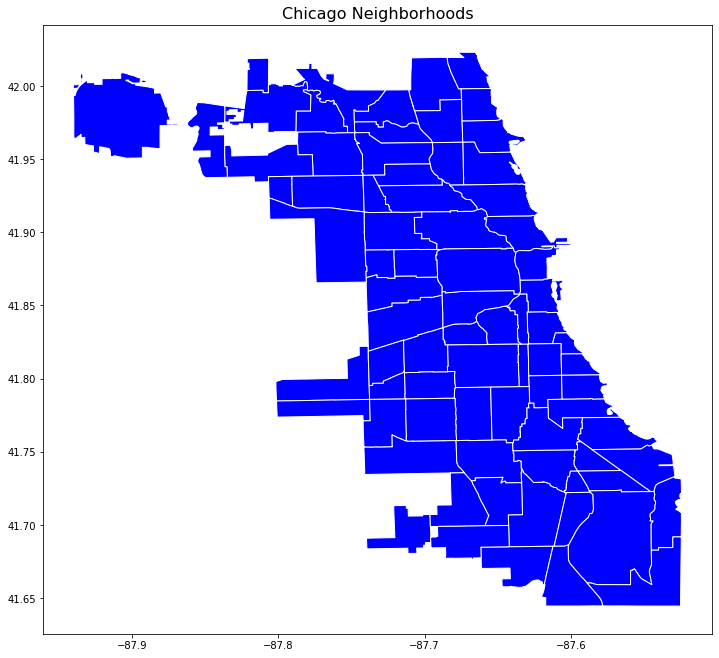

In [9]:
f, ax = plt.subplots(1, figsize=(12,12), linewidth=1.5)

neighbor_boundary.plot(figsize=(12,12), facecolor = 'blue', edgecolor = 'white', ax=ax, )
#f = f.suptitle('CHICAGO NEIGHBORHOODS', fontsize=16)
plt.title(label='Chicago Neighborhoods', fontsize=16)

#### Label the neighborhoods

In [10]:
print(neighbor_boundary.head())

   area area_num_1 area_numbe  comarea  comarea_id        community  \
0   0.0         35         35      0.0         0.0          DOUGLAS   
1   0.0         36         36      0.0         0.0          OAKLAND   
2   0.0         37         37      0.0         0.0      FULLER PARK   
3   0.0         38         38      0.0         0.0  GRAND BOULEVARD   
4   0.0         39         39      0.0         0.0          KENWOOD   

   perimeter    shape_area     shape_len  \
0        0.0  4.600462e+07  31027.054510   
1        0.0  1.691396e+07  19565.506153   
2        0.0  1.991670e+07  25339.089750   
3        0.0  4.849250e+07  28196.837157   
4        0.0  2.907174e+07  23325.167906   

                                            geometry  
0  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  
1  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  
2  POLYGON ((-87.62880 41.80189, -87.62879 41.801...  
3  POLYGON ((-87.60671 41.81681, -87.60670 41.816...  
4  POLYGON ((-87.59215 41.81693, 

Text(0.5, 1, 'Naming The Chicago Neighborhoods')

<Figure size 432x288 with 0 Axes>

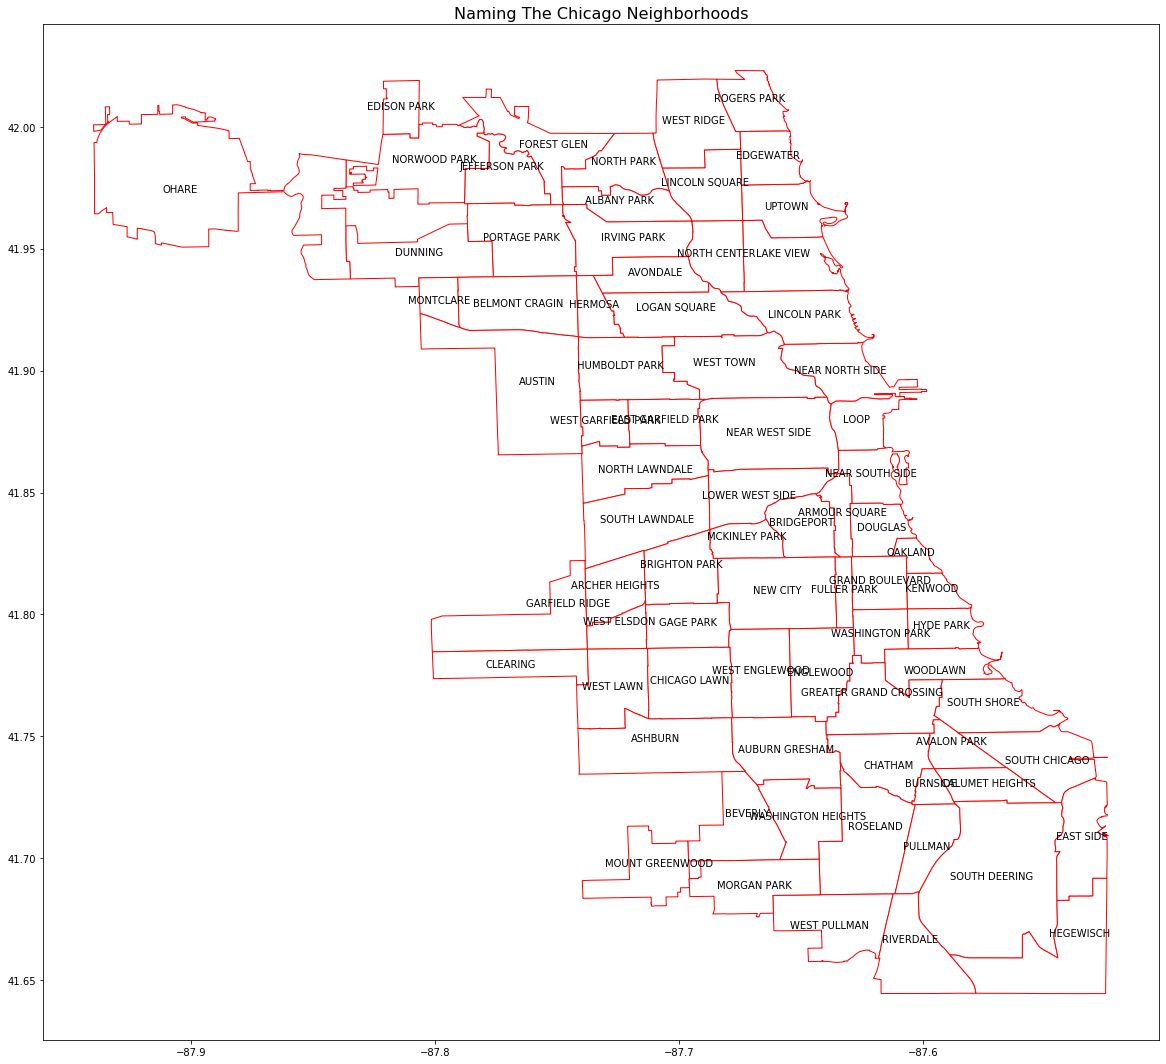

In [11]:
#Labeling Technique from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
neighbor_boundary['coords'] = neighbor_boundary['geometry'].apply(lambda x: x.representative_point().coords[:])
neighbor_boundary['coords'] = [coords[0] for coords in neighbor_boundary['coords']]

neighbor_boundary.plot(figsize=(20,20),  ax=ax, linewidth=1.5)
ax = neighbor_boundary.plot(figsize=(20,20), facecolor = 'white', edgecolor = 'red')

#neighborhoods_PPFD.plot()
for idx, row in neighbor_boundary.iterrows():
    plt.annotate(s=row['community'], xy=row['coords'],
                 horizontalalignment='center')
plt.title(label='Naming The Chicago Neighborhoods', fontsize=16)


In [12]:
#lets add the centroid to the neighborhood gdf so we willhave a single location for the neighborhood

neighbor_boundary['neigh_centroid'] = neighbor_boundary["geometry"].centroid
#neighbor_boundary.centroid

In [13]:
url= 'https://data.cityofchicago.org/api/geospatial/5jrd-6zik?method=export&format=Shapefile'
Chicago_census_tract = gpd.read_file(url)

## Download Food Access Data<a name= "anchor" id="DownloadFoodAccess"></a>


### Determine Chicago limited food access neighborhoods<a name="anchor" id="Chicagolimitedfoodaccessneigborhoods"></a>

1. intersect food_access_info censustracts for Cook County (Cook2) with Chicago Boundaries Geode = 
    Only Chicago  food access CEnsusTracts
2. Intersect Chcago Boundaries with the neighborhoods using  Geometry Chicago NeighborHoods.

#### Reference for  US CensusTracts: https://www2.census.gov/geo/pdfs/education/CensusTracts.pdf
Census tracts are small, relatively permanent statistical subdivisions of a United States county.
1. Average 4000 people
2. Maximum 8000 people
3. Minimum 1200 people

#### Get Chicago Census Tract<a name = "anchor" id = "GetChicagoCensusTract"></a>

In [14]:
Chicago_census_tract.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
commarea      801 non-null object
commarea_n    801 non-null float64
countyfp10    801 non-null object
geoid10       801 non-null object
name10        801 non-null object
namelsad10    801 non-null object
notes         12 non-null object
statefp10     801 non-null object
tractce10     801 non-null object
geometry      801 non-null geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 62.7+ KB


In [15]:
Chicago_census_tract.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


Text(0.5, 1, 'Outlining Chicago Census Tracts')

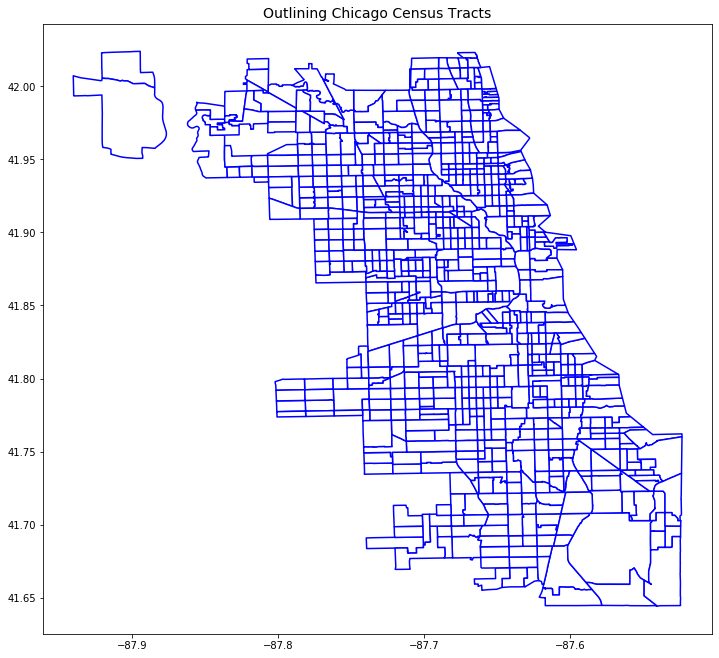

In [16]:
Chicago_census_tract.plot(figsize=(12,12), linewidth=1.5, edgecolor='blue', facecolor = 'white')
plt.title(label='Outlining Chicago Census Tracts', fontsize=14)

In [17]:
pd.set_option('display.max_rows', None)
#rename geoid10 to CensusTract

Chicago_census_tract_CensusTract = Chicago_census_tract.rename(columns = {'geoid10':'CensusTract'})
#convert CensusTract to int64
Chicago_census_tract_CensusTract['CensusTract'] = Chicago_census_tract_CensusTract['CensusTract'].astype('int64')
Chicago_census_tract_CensusTract.head()

,commarea,commarea_n,countyfp10,CensusTract,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


### Combine Chicago Neighborhood Map and Census Map<a name="anchor" id="CombineChicagoNeighborhoodMapandCensusMap"></a>

<function matplotlib.pyplot.show(*args, **kw)>

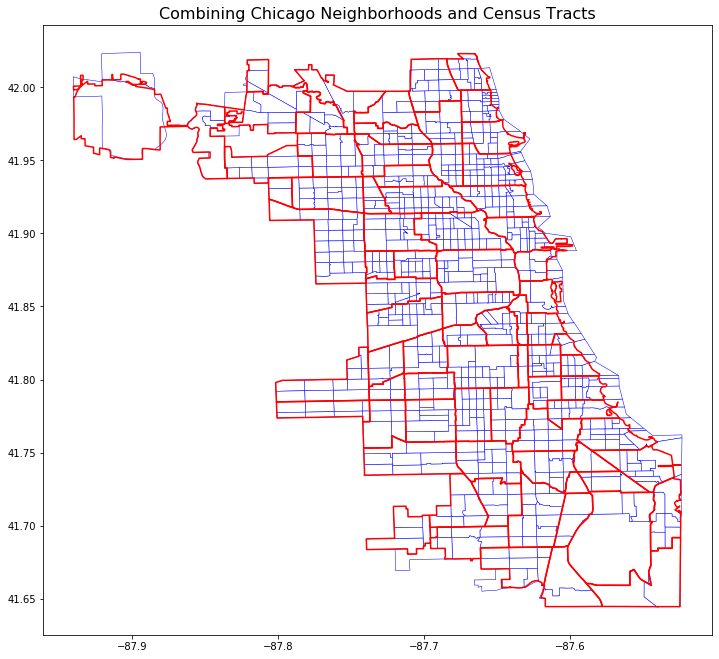

In [18]:
# Plot Chicago_census tract over Neighborhood

plot4 = Chicago_census_tract_CensusTract.plot(figsize=(12,12), edgecolor='blue', facecolor = 'white', linewidth =.5, label='Censustract')
plot3 = neighbor_boundary.plot(figsize=(12,12), edgecolor = 'red', facecolor='None',  
                               categorical=True, ax= plot4, linewidth=1.5, label='Neighborhoods')
#plt.legend()
plt.title(label='Combining Chicago Neighborhoods and Census Tracts', fontsize=16)
plt.show

In [19]:
neighbor_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
area              77 non-null float64
area_num_1        77 non-null object
area_numbe        77 non-null object
comarea           77 non-null float64
comarea_id        77 non-null float64
community         77 non-null object
perimeter         77 non-null float64
shape_area        77 non-null float64
shape_len         77 non-null float64
geometry          77 non-null geometry
coords            77 non-null object
neigh_centroid    77 non-null geometry
dtypes: float64(6), geometry(2), object(4)
memory usage: 7.3+ KB


In [20]:
# Process: Download Food Access data from  https://www.ERS.usda.gov/data-products/food-access-research-atlas/download-the-data/ 
# ERS has the data in an excel data set of the Food Access of all the states in the US. From this I extracted Illinois data  
# and then extracted Cook County from the Illinois data. 
# Cook county is in Illinois. From Cook County extract only Chicago data. Chicago is only one of the cities in Cook county
# I then imported Cook County Census track information  on food Desert

#Cook_food_access=pd.read_excel(r'C:\Users\Henry\Desktop\Coursera\DecisionScience\Capstone\Coursera_Capstone\Cook03.xlsx')

In [21]:
Cook_food_access= pd.read_excel(r'Cook03.xlsx')

In [22]:
Cook_food_access.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome
0,17031010100,Illinois,Cook,1,4854,2302,0,218,0.044911,1,1,1,29.7,44826
1,17031010201,Illinois,Cook,1,6450,2463,0,163,0.025271,0,0,1,32.8,43321
2,17031010202,Illinois,Cook,1,2818,1115,0,315,0.111781,0,0,1,30.6,46713
3,17031010300,Illinois,Cook,1,6236,2826,0,791,0.126844,1,1,1,26.8,48351
4,17031010400,Illinois,Cook,1,5042,2098,0,1349,0.267553,0,0,0,17.2,73491


In [23]:
Cook_food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 14 columns):
CensusTract             1316 non-null int64
State                   1316 non-null object
County                  1316 non-null object
Urban                   1316 non-null int64
POP2010                 1316 non-null int64
OHU2010                 1316 non-null int64
GroupQuartersFlag       1316 non-null int64
NUMGQTRS                1316 non-null int64
PCTGQTRS                1316 non-null float64
LILATracts_halfAnd10    1316 non-null int64
HUNVFlag                1316 non-null int64
LowIncomeTracts         1316 non-null int64
PovertyRate             1316 non-null float64
MedianFamilyIncome      1316 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 144.1+ KB


###  Isolate Chicago's limited food access neighborhoods<a name="anchor" id="IsolateChicagoslimitedfoodaccessneighborhoods"></a>
1. intersect food_access_info censustracts for Cook County (Cook2) with Chicago Boundaries Geoide = 
    Only Chicago  food access censusTracts
2. Intersect Chcago Boundaries with the neighborhoods using  Geometry Chicago Neighborhoods.
3. Select census tracts that have income in the range of greater than 26000 and less than 44000


In [24]:
### intersect (innerjoin) Cook_food_access_info with Chicago censustracts(low income/low access) 
#to get Only Chicago food desert CensusTracts in a income range of 26,000 to 44000 since ALDI has built in this income range

pd.set_option('display.max_rows', 500)
LILA_tracts01_in_Chicago = pd.merge(Cook_food_access, Chicago_census_tract_CensusTract[['CensusTract','geometry']], on='CensusTract', how = 'inner')
LILA_tracts01_in_Chicago['CensusTract'] = LILA_tracts01_in_Chicago['CensusTract'].astype('int64')
LILA_tracts01_in_Chicago = LILA_tracts01_in_Chicago.loc[(LILA_tracts01_in_Chicago['LILATracts_halfAnd10'] == 1) &  
                                                        (LILA_tracts01_in_Chicago['MedianFamilyIncome'] > 26000) &
                                                        (LILA_tracts01_in_Chicago['MedianFamilyIncome'] < 44000)]

LILA_tracts01_in_Chicago.info()
display(LILA_tracts01_in_Chicago.head())

display(LILA_tracts01_in_Chicago.CensusTract.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 30 to 798
Data columns (total 15 columns):
CensusTract             83 non-null int64
State                   83 non-null object
County                  83 non-null object
Urban                   83 non-null int64
POP2010                 83 non-null int64
OHU2010                 83 non-null int64
GroupQuartersFlag       83 non-null int64
NUMGQTRS                83 non-null int64
PCTGQTRS                83 non-null float64
LILATracts_halfAnd10    83 non-null int64
HUNVFlag                83 non-null int64
LowIncomeTracts         83 non-null int64
PovertyRate             83 non-null float64
MedianFamilyIncome      83 non-null int64
geometry                83 non-null geometry
dtypes: float64(2), geometry(1), int64(10), object(2)
memory usage: 10.4+ KB


,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,geometry
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,1,1,23.6,39643,"POLYGON ((-87.67470 41.99076, -87.67473 41.991..."
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,1,1,43.8,26818,"POLYGON ((-87.72098 41.88802, -87.72179 41.887..."
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,1,1,33.0,26250,"POLYGON ((-87.70185 41.89560, -87.70212 41.895..."
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,1,1,37.3,29238,"POLYGON ((-87.75828 41.90947, -87.75810 41.909..."
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,0,1,27.4,35997,"POLYGON ((-87.74849 41.90551, -87.74849 41.905..."


array([17031030300, 17031231500, 17031242700, 17031250700, 17031250800,
       17031251000, 17031251100, 17031251300, 17031251400, 17031251500,
       17031251600, 17031251700, 17031251800, 17031252102, 17031252201,
       17031282700, 17031351500, 17031380500, 17031420100, 17031420200,
       17031430101, 17031430600, 17031430700, 17031430800, 17031431302,
       17031431400, 17031440101, 17031440201, 17031460100, 17031460200,
       17031470100, 17031490600, 17031491000, 17031491200, 17031491300,
       17031491400, 17031500200, 17031500300, 17031510100, 17031510300,
       17031520200, 17031530100, 17031530501, 17031530503, 17031530600,
       17031560200, 17031580100, 17031580200, 17031580400, 17031580600,
       17031580700, 17031611600, 17031612100, 17031640600, 17031660800,
       17031670300, 17031670400, 17031670500, 17031670600, 17031670900,
       17031671300, 17031690900, 17031710600, 17031710700, 17031711000,
       17031711100, 17031711500, 17031830500, 17031831400, 17031

In [25]:
#there are 83 census tracts that are food deserts in Chicago where the household income ranges from 26,000 to 44,000
from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
LILA_gdf = GeoDataFrame(LILA_tracts01_in_Chicago, geometry = 'geometry', crs=crs)
LILA_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 30 to 798
Data columns (total 15 columns):
CensusTract             83 non-null int64
State                   83 non-null object
County                  83 non-null object
Urban                   83 non-null int64
POP2010                 83 non-null int64
OHU2010                 83 non-null int64
GroupQuartersFlag       83 non-null int64
NUMGQTRS                83 non-null int64
PCTGQTRS                83 non-null float64
LILATracts_halfAnd10    83 non-null int64
HUNVFlag                83 non-null int64
LowIncomeTracts         83 non-null int64
PovertyRate             83 non-null float64
MedianFamilyIncome      83 non-null int64
geometry                83 non-null geometry
dtypes: float64(2), geometry(1), int64(10), object(2)
memory usage: 10.4+ KB


### Plot 2015 food desert census tracts in Chicago Neighborhoods where family income is 26000 to 44000<a name="anchor" id="Plot2015fooddesertcensustractsinChicagoNeighborhoods"></a>

Text(0.5, 1, 'Desert Census Tracts')

<Figure size 432x288 with 0 Axes>

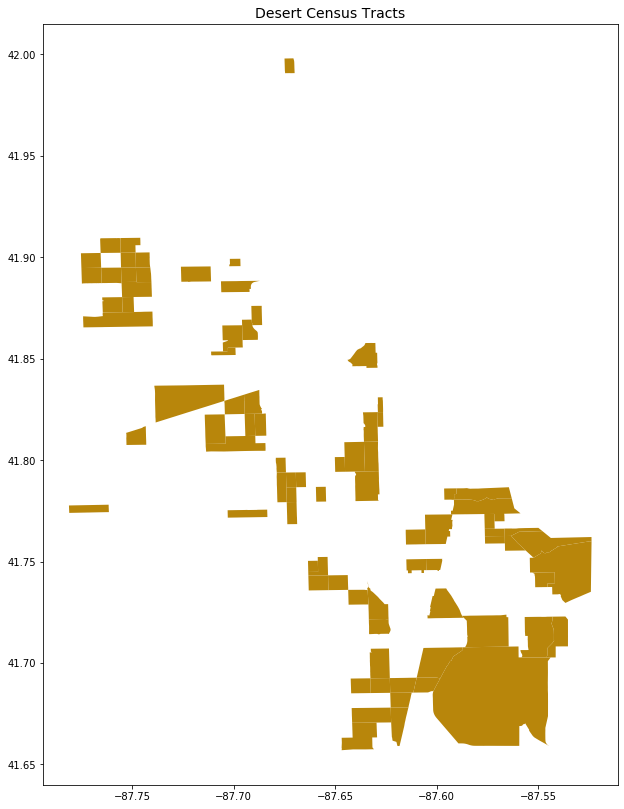

In [26]:
#Census tracts that are food deserts in the 26000 to 44000 range
fig = plt.figure()
plot3 = LILA_gdf.plot(figsize=(14,14), facecolor = 'darkgoldenrod') # Neighborhoods with food deserts
plt.title(label='Desert Census Tracts', fontsize=14)
#plt.show()

In [27]:
#test1.a get the centroid of ppfd geometry
#Changes the geometry geocodes to the Centroid geocodes
#https://stackoverflow.com/questions/56989956/creating-a-centroid-column-from-geometry-shape-field-produces-attributeerror-n
LILA_gdf_centroid = LILA_gdf.copy()
LILA_gdf_centroid["geometry"] = LILA_gdf_centroid["geometry"].centroid
LILA_gdf_centroid.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,geometry
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,1,1,23.6,39643,POINT (-87.67253 41.99439)
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,1,1,43.8,26818,POINT (-87.71866 41.89173)
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,1,1,33.0,26250,POINT (-87.69937 41.89743)
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,1,1,37.3,29238,POINT (-87.76081 41.90582)
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,0,1,27.4,35997,POINT (-87.75147 41.90618)


In [28]:
neighborhoods_PPFD = gpd.sjoin( LILA_gdf_centroid, neighbor_boundary, how="inner", op='intersects')
neighborhoods_PPFD.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 81 entries, 30 to 792
Data columns (total 27 columns):
CensusTract             81 non-null int64
State                   81 non-null object
County                  81 non-null object
Urban                   81 non-null int64
POP2010                 81 non-null int64
OHU2010                 81 non-null int64
GroupQuartersFlag       81 non-null int64
NUMGQTRS                81 non-null int64
PCTGQTRS                81 non-null float64
LILATracts_halfAnd10    81 non-null int64
HUNVFlag                81 non-null int64
LowIncomeTracts         81 non-null int64
PovertyRate             81 non-null float64
MedianFamilyIncome      81 non-null int64
geometry                81 non-null geometry
index_right             81 non-null int64
area                    81 non-null float64
area_num_1              81 non-null object
area_numbe              81 non-null object
comarea                 81 non-null float64
comarea_id              81 non-n

Text(0.5, 1, 'Combining Chicago Food Desert Census Tracts and Their Centroids')

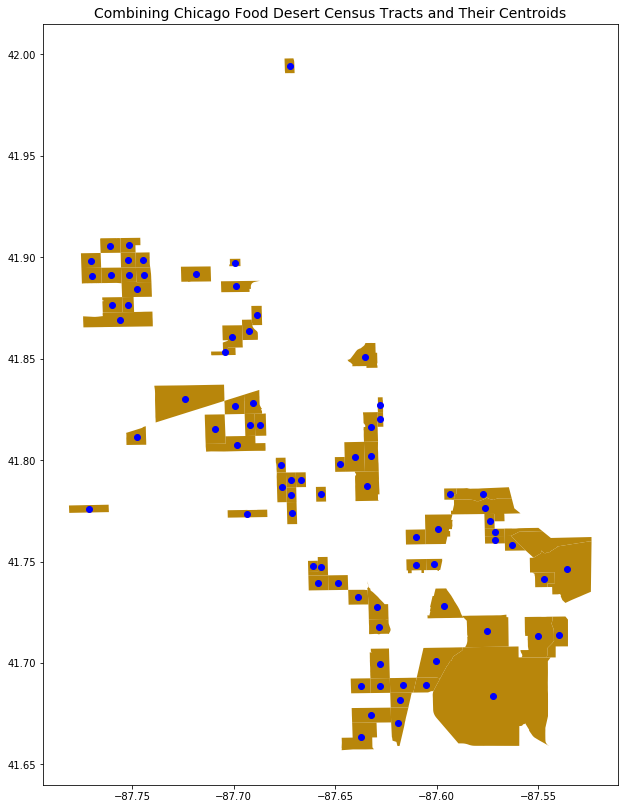

In [29]:
#Adding centroids to the food desert census tracts
c = LILA_gdf.plot(figsize=(14,14), facecolor = 'darkgoldenrod') # food desert census tracts
b = neighborhoods_PPFD.plot(facecolor = 'blue',  figsize=(14,14), ax=c , edgecolor = 'blue')
plt.title(label='Combining Chicago Food Desert Census Tracts and Their Centroids', fontsize=14)

Text(0.5, 1, 'Combining Chicago Neighborhoods and Census Tracts adding Food Desert Centroids')

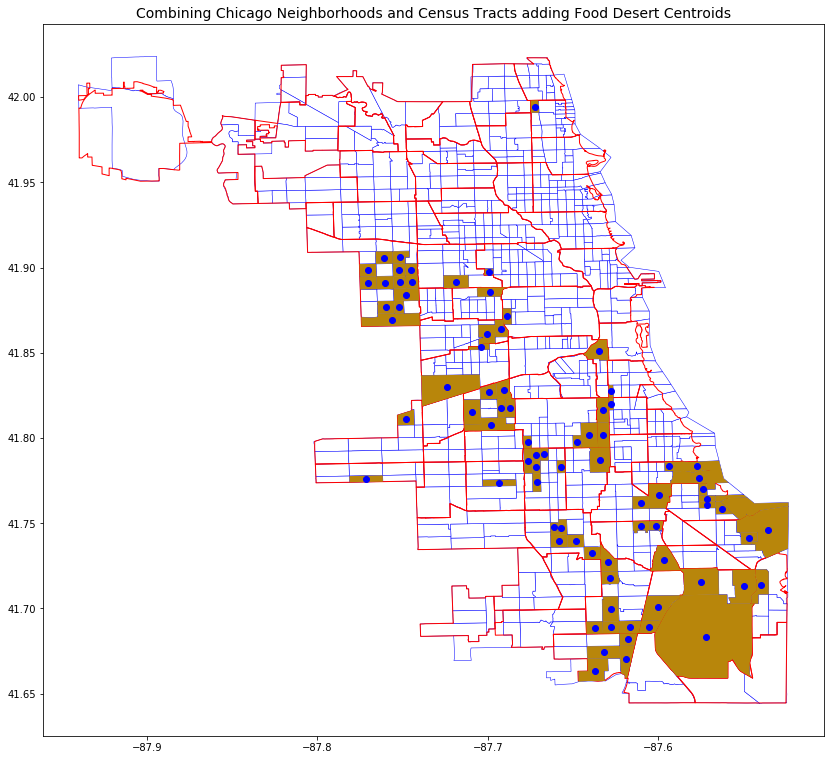

In [30]:
e = Chicago_census_tract.plot(figsize=(14,14), edgecolor='blue', facecolor = 'white', linewidth =.5)
d = neighbor_boundary.plot(figsize=(14,14), facecolor = 'None', edgecolor='red', ax=e)
c = LILA_gdf.plot(figsize=(14,14), facecolor = 'darkgoldenrod', ax=d) # food desert census tracts
b = neighborhoods_PPFD.plot(facecolor = 'blue',  figsize=(14,14), ax=c , edgecolor = 'blue')
plt.title(label='Combining Chicago Neighborhoods and Census Tracts adding Food Desert Centroids', fontsize=14)

In [31]:
#There are 187 food desert intersections with chicago neighborhoods;
# for example the food desert located in west ridge intersects with three neighborhoods,
# (rogers park, edgewater and west ridge).
# this is not what we want. so lets get the centroid of the food deserts in the neighborhood it/they is/are located in.
display(neighborhoods_PPFD.head())
neighborhoods_PPFD.info()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,...,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,coords,neigh_centroid
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"(-87.66377044544015, 41.98717171000365)",POINT (-87.66342 41.98671)
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,...,23,23,0.0,0.0,HUMBOLDT PARK,0.0,1.004809e+08,48583.064330,"(-87.72394946581986, 41.90091941429531)",POINT (-87.72092 41.90007)
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,...,24,24,0.0,0.0,WEST TOWN,0.0,1.275629e+08,55203.718696,"(-87.68154942821096, 41.90226800084829)",POINT (-87.67636 41.90121)
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,...,25,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410)
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,...,25,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 81 entries, 30 to 792
Data columns (total 27 columns):
CensusTract             81 non-null int64
State                   81 non-null object
County                  81 non-null object
Urban                   81 non-null int64
POP2010                 81 non-null int64
OHU2010                 81 non-null int64
GroupQuartersFlag       81 non-null int64
NUMGQTRS                81 non-null int64
PCTGQTRS                81 non-null float64
LILATracts_halfAnd10    81 non-null int64
HUNVFlag                81 non-null int64
LowIncomeTracts         81 non-null int64
PovertyRate             81 non-null float64
MedianFamilyIncome      81 non-null int64
geometry                81 non-null geometry
index_right             81 non-null int64
area                    81 non-null float64
area_num_1              81 non-null object
area_numbe              81 non-null object
comarea                 81 non-null float64
comarea_id              81 non-n

In [32]:
#LILA_in_Neighborhood.info()

In [33]:
#https://gis.stackexchange.com/questions/166820/geopandas-return-lat-and-long-of-a-centroid-point
neighborhoods_PPFD['ppfd_centroid'] = neighborhoods_PPFD.geometry.centroid
display(neighborhoods_PPFD.head())

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,...,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,coords,neigh_centroid,ppfd_centroid
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"(-87.66377044544015, 41.98717171000365)",POINT (-87.66342 41.98671),POINT (-87.67253 41.99439)
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,...,23,0.0,0.0,HUMBOLDT PARK,0.0,1.004809e+08,48583.064330,"(-87.72394946581986, 41.90091941429531)",POINT (-87.72092 41.90007),POINT (-87.71866 41.89173)
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,...,24,0.0,0.0,WEST TOWN,0.0,1.275629e+08,55203.718696,"(-87.68154942821096, 41.90226800084829)",POINT (-87.67636 41.90121),POINT (-87.69937 41.89743)
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,...,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410),POINT (-87.76081 41.90582)
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,...,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410),POINT (-87.75147 41.90618)


In [34]:
# Of Chicago's 77 neighborhoods in which there are 188 food deserts, 50 neighborhoods 
# have food deserts within them   
neighborhoods_PPFD.community.unique()

array(['EDGEWATER', 'HUMBOLDT PARK', 'WEST TOWN', 'AUSTIN',
       'NEAR WEST SIDE', 'DOUGLAS', 'GRAND BOULEVARD', 'WOODLAWN',
       'SOUTH SHORE', 'CHATHAM', 'SOUTH CHICAGO', 'BURNSIDE', 'ROSELAND',
       'PULLMAN', 'SOUTH DEERING', 'EAST SIDE', 'WEST PULLMAN',
       'GARFIELD RIDGE', 'BRIGHTON PARK', 'NEW CITY', 'CLEARING',
       'CHICAGO LAWN', 'WEST ENGLEWOOD', 'GREATER GRAND CROSSING',
       'AUBURN GRESHAM', 'SOUTH LAWNDALE', 'ENGLEWOOD', 'FULLER PARK',
       'EAST GARFIELD PARK', 'ARMOUR SQUARE', 'NORTH LAWNDALE'],
      dtype=object)

### Find the centroid of the food desert census tracks in each neighborhood<a name= "anchor" id="Findthecentroidofthefooddesertcensustracksineachneighborhood"></a>

In [35]:
type(neighborhoods_PPFD.geometry)

geopandas.geoseries.GeoSeries

In [36]:
display(neighborhoods_PPFD.head())

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,...,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,coords,neigh_centroid,ppfd_centroid
30,17031030300,Illinois,Cook,1,3322,1393,0,0,0.00000,1,...,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"(-87.66377044544015, 41.98717171000365)",POINT (-87.66342 41.98671),POINT (-87.67253 41.99439)
280,17031231500,Illinois,Cook,1,6039,1973,0,102,0.01689,1,...,23,0.0,0.0,HUMBOLDT PARK,0.0,1.004809e+08,48583.064330,"(-87.72394946581986, 41.90091941429531)",POINT (-87.72092 41.90007),POINT (-87.71866 41.89173)
302,17031242700,Illinois,Cook,1,2029,702,0,0,0.00000,1,...,24,0.0,0.0,WEST TOWN,0.0,1.275629e+08,55203.718696,"(-87.68154942821096, 41.90226800084829)",POINT (-87.67636 41.90121),POINT (-87.69937 41.89743)
316,17031250700,Illinois,Cook,1,6098,2052,0,0,0.00000,1,...,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410),POINT (-87.76081 41.90582)
317,17031250800,Illinois,Cook,1,2488,763,0,0,0.00000,1,...,25,0.0,0.0,AUSTIN,0.0,1.992542e+08,75226.474917,"(-87.75805350782073, 41.89454185383168)",POINT (-87.76311 41.89410),POINT (-87.75147 41.90618)


In [37]:
#Labeling food deserts by neighborhoods: Technique from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
neighborhoods_PPFD['coords'] = neighborhoods_PPFD['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhoods_PPFD['coords'] = [coords[0] for coords in neighborhoods_PPFD['coords']]

In [38]:
#Step 1 group PPFD by Neighborhoods in new gdf
#https://stackoverflow.com/questions/40666126/how-to-group-by-one-column-and-sort-the-values-of-another-column
#neighborhoods_PPFD_group = None
neighborhoods_PPFD_group =  neighborhoods_PPFD.groupby('community', as_index = False).apply(lambda x:x.sort_values('PovertyRate'))

#step 2 keep columns that are potentially profitable for ALDI
neighborhoods_PPFD_group = neighborhoods_PPFD_group.filter(['community','PovertyRate','ppfd_centroid', 'geometry'], axis=1)
#neighborhoods_PPFD_group.rename(columns= {'community': 'neighborhood'}, inplace=True)
display(neighborhoods_PPFD_group.head())
print(type(neighborhoods_PPFD_group))
print(neighborhoods_PPFD_group.info())

community  PovertyRate               ppfd_centroid  \
0 771   ARMOUR SQUARE         36.0  POINT (-87.63510 41.85101)   
1 655  AUBURN GRESHAM         23.2  POINT (-87.63869 41.73244)   
  647  AUBURN GRESHAM         28.1  POINT (-87.65688 41.74711)   
  651  AUBURN GRESHAM         30.9  POINT (-87.65830 41.73950)   
  650  AUBURN GRESHAM         31.9  POINT (-87.64858 41.73964)   

                         geometry  
0 771  POINT (-87.63510 41.85101)  
1 655  POINT (-87.63869 41.73244)  
  647  POINT (-87.65688 41.74711)  
  651  POINT (-87.65830 41.73950)  
  650  POINT (-87.64858 41.73964)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 81 entries, (0, 771) to (30, 433)
Data columns (total 4 columns):
community        81 non-null object
PovertyRate      81 non-null float64
ppfd_centroid    81 non-null geometry
geometry         81 non-null geometry
dtypes: float64(1), geometry(2), object(1)
memory usage: 3.6+ KB
None


In [39]:
#step 3 calculate center of the food desert neighborhood census centroids
#using technique from: https://medium.com/@shakasom/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea
from shapely.geometry import Point

neighborhoods_PPFD_group["centroid_x"] = neighborhoods_PPFD_group.centroid.y
neighborhoods_PPFD_group["centroid_y"] = neighborhoods_PPFD_group.centroid.x

neighborhood_PPFD_centroid_means = neighborhoods_PPFD_group.groupby('community').aggregate({'centroid_x' : 'mean', 'centroid_y' : 'mean'})

neighborhood_PPFD_centroid_means['geometry']   = [Point(xy) for xy in zip(neighborhood_PPFD_centroid_means['centroid_y'],
                                                                    neighborhood_PPFD_centroid_means['centroid_x'])]
neighborhood_PPFD_centroid_means_gdf = gpd.GeoDataFrame(neighborhood_PPFD_centroid_means)
neighborhood_PPFD_centroid_means_gdf.reset_index(inplace=True)
print(neighborhood_PPFD_centroid_means_gdf.info())
display(neighborhood_PPFD_centroid_means_gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
community     31 non-null object
centroid_x    31 non-null float64
centroid_y    31 non-null float64
geometry      31 non-null geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.1+ KB
None


,community,centroid_x,centroid_y,geometry
0,ARMOUR SQUARE,41.851006,-87.635098,POINT (-87.63510 41.85101)
1,AUBURN GRESHAM,41.741271,-87.652679,POINT (-87.65268 41.74127)
2,AUSTIN,41.890708,-87.755555,POINT (-87.75556 41.89071)
3,BRIGHTON PARK,41.818754,-87.696077,POINT (-87.69608 41.81875)
4,BURNSIDE,41.728221,-87.596490,POINT (-87.59649 41.72822)


#### Now we have the mean of the centroids of the census tract neighborhood food deserts

Text(0.5, 1, 'Combining Chicago Neighborhoods and Census Tracts and Neighborhood Food Desert Centroids')

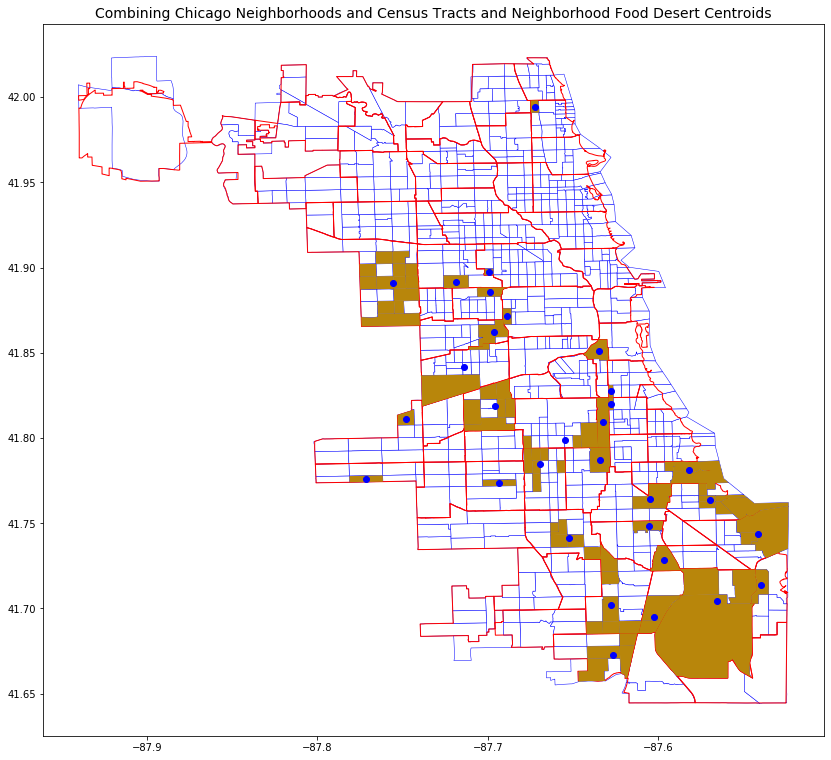

In [40]:
#e = Chicago_census_tract.plot(figsize=(14,14), edgecolor='blue', facecolor = 'white', linewidth =.5)
#plot4 = Chicago_census_tract.plot(figsize=(15,15), edgecolor='blue', facecolor="None",  linewidth =.5 )
#plot1 = neighborhood_PPFD_centroid_means_gdf.plot(figsize=(15,15), color='blue', ax = plot4)

e = Chicago_census_tract.plot(figsize=(14,14), edgecolor='blue', facecolor = 'white', linewidth =.5)
d = neighbor_boundary.plot(figsize=(14,14), facecolor = 'None', edgecolor='red', ax=e)
c = LILA_gdf.plot(figsize=(14,14), facecolor = 'darkgoldenrod', ax=d) # food desert census tracts
b = neighborhood_PPFD_centroid_means_gdf.plot(facecolor = 'blue',  figsize=(14,14), ax=c , edgecolor = 'blue')
plt.title(label='Combining Chicago Neighborhoods and Census Tracts and Neighborhood Food Desert Centroids', fontsize=14)

## Let us find Chicago's ALDI <a name= "anchor" id="LetusfindChicago'sALDI"></a>

The general plan is that we will see that there are 33 ALDIs in Chicago proper. However, by observation we can see that there are about 10 that are either close to or in a food desert where the household  income is between 26000 and 44000. 

These specific food deserts are represented by the orange areas in the map. Later the green dots represent the ALDIs

1. We get the centroid of census tract  in the PPFD
2. We get the centroid of the neighborhoods containing the censustract
3. We get the unique neighborhoods
4. We get the distance from the ALDIs to the centroid of the unique neighborhood


In [41]:
#Here I have hand collected the ALDI store locations in Chicago and then coded them in to  excel
neighbor_ALDI2 = pd.read_csv(r'Chicago_ALDI_geocodes2.csv')

In [42]:
display(neighbor_ALDI2)

,StoreName,Address,City,State,Country,ZIP,Latitude,Longitude
0,ALDI,1739 W Cermak Rd,Chicago,IL,USA,60608,41.851661,-87.670216
1,ALDI,1753 N Milwaukee Ave,Chicago,IL,USA,60609,41.913324,-87.681777
2,ALDI,1836 N Clybourn Ave,Chicago,IL,USA,60610,41.914397,-87.654833
3,ALDI,1508 W 47th St,Chicago,IL,USA,60611,41.809446,-87.662814
4,ALDI,8500 S Holland Rd,Chicago,IL,USA,60612,41.739332,-87.632404
5,ALDI,3320 W Belmont Ave,Chicago,IL,USA,60613,41.939909,-87.711496
6,ALDI,7800 S South Chicago Ave,Chicago,IL,USA,60614,41.752635,-87.587967
7,ALDI,6621 S Cottage Grove Ave,Chicago,IL,USA,60615,41.774562,-87.605446
8,ALDI,800 N Kedzie Ave,Chicago,IL,USA,60616,41.896603,-87.707938
9,ALDI,6520 W Fullerton Ave,Chicago,IL,USA,60617,41.925941,-87.788707


In [43]:
# convert to a GDF
neighbor_ALDI2_gdf = gpd.GeoDataFrame(neighbor_ALDI2, geometry=gpd.points_from_xy
                                           (neighbor_ALDI2.Longitude, neighbor_ALDI2.Latitude))

In [44]:
print(neighbor_ALDI2_gdf.head())
type(neighbor_ALDI2_gdf)
neighbor_ALDI2_gdf.info()

  StoreName               Address     City State Country    ZIP   Latitude  \
0      ALDI      1739 W Cermak Rd  Chicago    IL     USA  60608  41.851661   
1      ALDI  1753 N Milwaukee Ave  Chicago    IL     USA  60609  41.913324   
2      ALDI   1836 N Clybourn Ave  Chicago    IL     USA  60610  41.914397   
3      ALDI        1508 W 47th St  Chicago    IL     USA  60611  41.809446   
4      ALDI     8500 S Holland Rd  Chicago    IL     USA  60612  41.739332   

   Longitude                    geometry  
0 -87.670216  POINT (-87.67022 41.85166)  
1 -87.681777  POINT (-87.68178 41.91332)  
2 -87.654833  POINT (-87.65483 41.91440)  
3 -87.662814  POINT (-87.66281 41.80945)  
4 -87.632404  POINT (-87.63240 41.73933)  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
StoreName    34 non-null object
Address      34 non-null object
City         34 non-null object
State        34 non-null object
Country      34 non-null object
ZIP

#### In the maps below we can see that there are 34 ALDI's, represented by the green dots, Chicago proper represented by the magenta dots. However, by observation there are 8 that are either close to or in a food desert with a household  income between 26000 and 44000. These specific food deserts are represented by the blue areas in this map. 

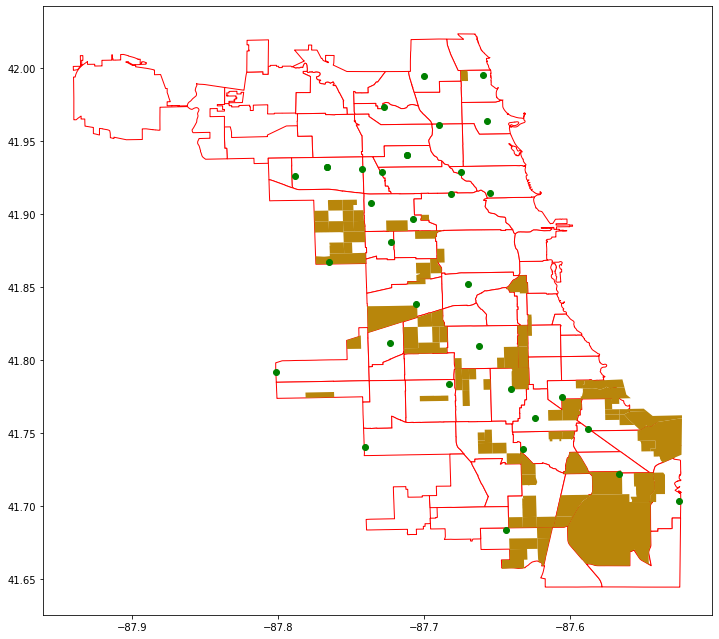

In [45]:
#plot ALDI's over a neighhood and then we will add the food deserts of 2015

ax = neighbor_boundary.plot(figsize=(12,12), color = 'white', edgecolor='red')
bx = LILA_gdf.plot(color = 'darkgoldenrod', ax=ax)
neighbor_ALDI2_gdf.plot(ax=bx, color='green' )


#### Let's now introduce the centroids of the food desert censustracts for a complete picture

Text(0.5, 1, 'Chicago Neighborhoods, Census Tracts, Food Desert Centroids and ALDIs')

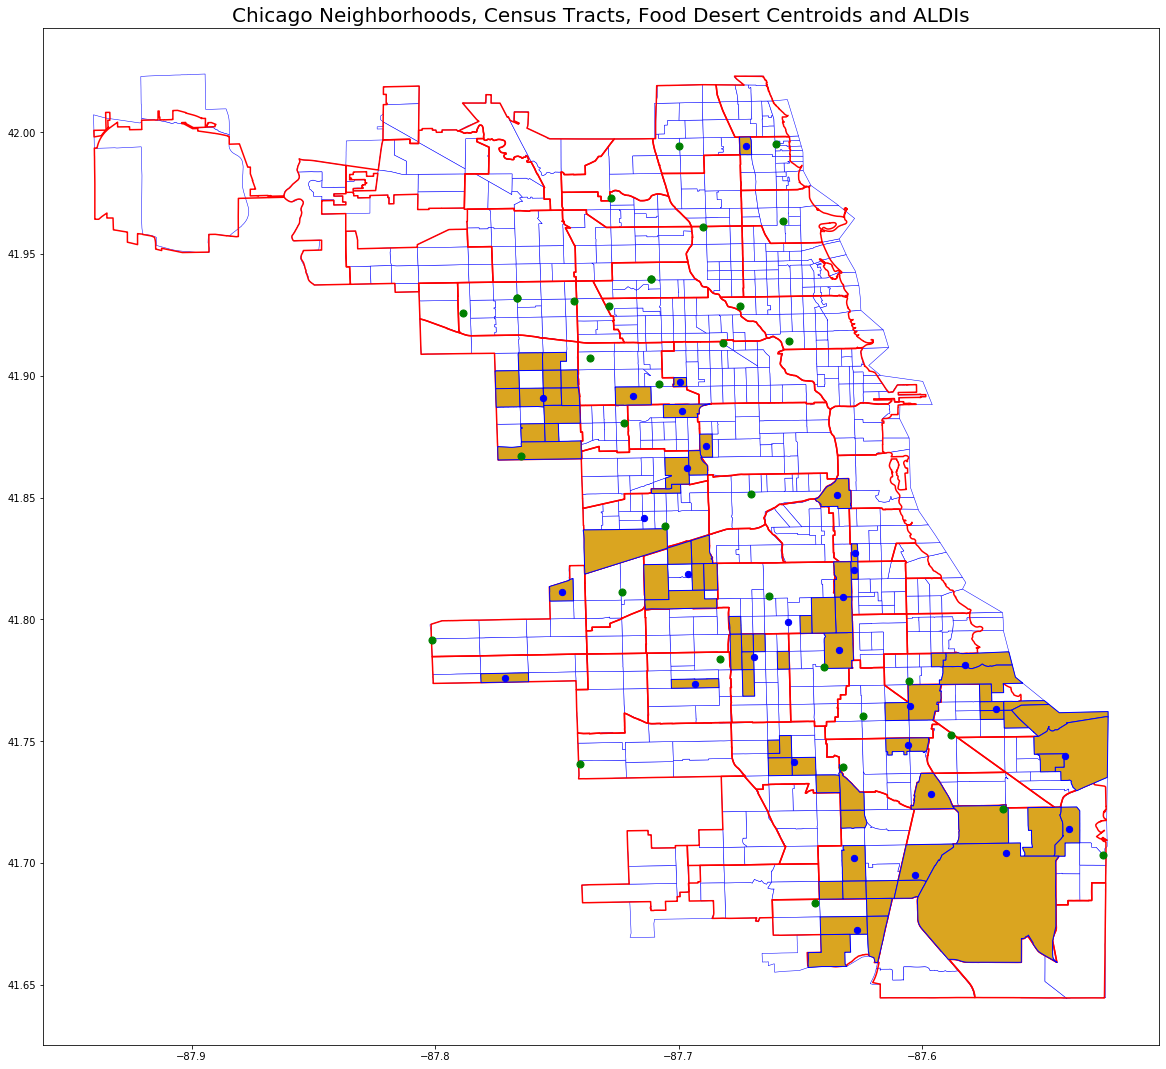

In [46]:
plot4 = Chicago_census_tract.plot(figsize=(20,20), edgecolor='blue', facecolor = 'white', linewidth =.5)
plot3 = neighbor_boundary.plot(figsize=(20,20), edgecolor = 'red', facecolor='None',  ax= plot4, linewidth=1.5)

plot2 = LILA_gdf.plot(figsize=(20,20), facecolor = 'goldenrod',  edgecolor = 'blue', ax=plot3) # Neighborhoods with food deserts
plot1 = neighborhood_PPFD_centroid_means_gdf.plot(figsize=(20,20), color='blue', ax=plot2, markersize=40)
neighbor_ALDI2_gdf.plot(color='green' , ax=plot1, markersize=50)
plt.title(label='Chicago Neighborhoods, Census Tracts, Food Desert Centroids and ALDI''s', fontsize=20)

In [47]:
# Calulate distance between latitude and longitude
# https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe

In [48]:
neighbor_ALDI2_gdf['Address']

0             1739 W Cermak Rd
1         1753 N Milwaukee Ave
2          1836 N Clybourn Ave
3               1508 W 47th St
4            8500 S Holland Rd
5           3320 W Belmont Ave
6     7800 S South Chicago Ave
7     6621 S Cottage Grove Ave
8             800 N Kedzie Ave
9         6520 W Fullerton Ave
10           4501 S Pulaski Rd
11           5001 N Pulaski Rd
12             4500 N Broadway
13          2828 N Central Ave
14              821 W 115th St
15          6025 S Western Ave
16           3030 S Kedzie Ave
17         4645 W Diversey Ave
18           3835 W Madison St
19             6221 N Broadway
20           8333 S Cicero Ave
21              2333 E 95th St
22           5501 S Harlem Ave
23    10532 S Indianapolis Ave
24          5629 W Fillmore St
25       4030 W Wrightwood Ave
26      620 W 63rd St, Chicago
27          1440 N Kostner Ave
28       6220 N California Ave
29         2431 W Montrose Ave
30          2828 N Central Ave
31         2600 N Clybourn Ave
32      

In [49]:
#assign Seattle, a far away point, to use as closest ALDI default to be overridden by ALDI addresses in Chicago
neighborhood_PPFD_centroid_means_gdf['Closest_ALDI'] = Point(47.6062, -122.3321)
neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] = 2500.1
neighborhood_PPFD_centroid_means_gdf['Address_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Address']
neighborhood_PPFD_centroid_means_gdf['Latitude_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Latitude'] 
neighborhood_PPFD_centroid_means_gdf['Longitude_of_Nearest_ALDI'] = neighbor_ALDI2_gdf['Longitude'] 
neighborhood_PPFD_centroid_means_gdf.head()

,community,centroid_x,centroid_y,geometry,Closest_ALDI,Distant_to_ALDI,Address_of_Nearest_ALDI,Latitude_of_Nearest_ALDI,Longitude_of_Nearest_ALDI
0,ARMOUR SQUARE,41.851006,-87.635098,POINT (-87.63510 41.85101),POINT (47.6062 -122.3321),2500.1,1739 W Cermak Rd,41.851661,-87.670216
1,AUBURN GRESHAM,41.741271,-87.652679,POINT (-87.65268 41.74127),POINT (47.6062 -122.3321),2500.1,1753 N Milwaukee Ave,41.913324,-87.681777
2,AUSTIN,41.890708,-87.755555,POINT (-87.75556 41.89071),POINT (47.6062 -122.3321),2500.1,1836 N Clybourn Ave,41.914397,-87.654833
3,BRIGHTON PARK,41.818754,-87.696077,POINT (-87.69608 41.81875),POINT (47.6062 -122.3321),2500.1,1508 W 47th St,41.809446,-87.662814
4,BURNSIDE,41.728221,-87.596490,POINT (-87.59649 41.72822),POINT (47.6062 -122.3321),2500.1,8500 S Holland Rd,41.739332,-87.632404


In [50]:
#shows there are 15 neighborhoods that have no ALDI Assuming there are not 2 ADLI's or more in any neighborhood
print(neighborhood_PPFD_centroid_means_gdf.info())
print(neighbor_ALDI2_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
community                    31 non-null object
centroid_x                   31 non-null float64
centroid_y                   31 non-null float64
geometry                     31 non-null geometry
Closest_ALDI                 31 non-null object
Distant_to_ALDI              31 non-null float64
Address_of_Nearest_ALDI      31 non-null object
Latitude_of_Nearest_ALDI     31 non-null float64
Longitude_of_Nearest_ALDI    31 non-null float64
dtypes: float64(5), geometry(1), object(3)
memory usage: 2.3+ KB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
StoreName    34 non-null object
Address      34 non-null object
City         34 non-null object
State        34 non-null object
Country      34 non-null object
ZIP          34 non-null int64
Latitude     34 non-null float64
Longitude    34 non-null float64
geometry     3

In [51]:
#lets find the closest ALDI
from geopy.distance import distance
from geopy.distance import geodesic 
import geopandas as gp
# https://www.programcreek.com/python/example/96854/geopy.distance.distance   no.10
for center, coord in neighborhood_PPFD_centroid_means_gdf.iterrows():
    neighlat = neighborhood_PPFD_centroid_means_gdf.centroid_x[center]
    neighlon = neighborhood_PPFD_centroid_means_gdf.centroid_y[center]

    for dist, aldi in neighbor_ALDI2_gdf.iterrows():
        distlat = neighbor_ALDI2_gdf.Latitude[dist]
        distlon = neighbor_ALDI2_gdf.Longitude[dist]      
        dist_to_ALDI = distance((neighlat,neighlon),(distlat,distlon)).miles
        
        if dist_to_ALDI < neighborhood_PPFD_centroid_means_gdf.Distant_to_ALDI[center]:
            neighborhood_PPFD_centroid_means_gdf.Distant_to_ALDI.loc[center] = dist_to_ALDI
            neighborhood_PPFD_centroid_means_gdf.Address_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Address[dist]
            neighborhood_PPFD_centroid_means_gdf.Latitude_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Latitude[dist]
            neighborhood_PPFD_centroid_means_gdf.Longitude_of_Nearest_ALDI.loc[center] = neighbor_ALDI2_gdf.Longitude[dist]
            neighborhood_PPFD_centroid_means_gdf.Closest_ALDI.loc[center] = neighbor_ALDI2_gdf.geometry[dist]
                        
print(neighborhood_PPFD_centroid_means_gdf.head(8))
neighborhood_PPFD_centroid_means_gdf.info()   

C:\Users\Henry\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


        community  centroid_x  centroid_y                    geometry  \
0   ARMOUR SQUARE   41.851006  -87.635098  POINT (-87.63510 41.85101)   
1  AUBURN GRESHAM   41.741271  -87.652679  POINT (-87.65268 41.74127)   
2          AUSTIN   41.890708  -87.755555  POINT (-87.75556 41.89071)   
3   BRIGHTON PARK   41.818754  -87.696077  POINT (-87.69608 41.81875)   
4        BURNSIDE   41.728221  -87.596490  POINT (-87.59649 41.72822)   
5         CHATHAM   41.748423  -87.605735  POINT (-87.60573 41.74842)   
6    CHICAGO LAWN   41.773641  -87.693266  POINT (-87.69327 41.77364)   
7        CLEARING   41.776036  -87.771430  POINT (-87.77143 41.77604)   

                           Closest_ALDI  Distant_to_ALDI  \
0          POINT (-87.670216 41.851661)         1.812690   
1  POINT (-87.63240400000001 41.739332)         1.056540   
2          POINT (-87.736576 41.907261)         1.504294   
3  POINT (-87.70563800000001 41.838249)         1.433154   
4          POINT (-87.566698 41.722142)   

### Now lets find the ALDI, that are within 3/4  mile from centroid of a food desert neighborhood<a name ="anchor" id ="NowletsfindtheALDIthatarewithin1/2mile"></a>

In [52]:
# Now want to  a) find the food deserts that are within 3/4 mile of food desert neighborhood centroid
#              b) find the customer satisfaction with those ALDIs
#              c) Then Find the neighborhoods in food deserts that might be good candidtates for a new ALDI's 

#THere are 91 neighborhoods in Chicago. 49 have food deserts. 41 have no food chain in the neighborhood as of the 
# 2010 census. currently ALDI has opened 7 stores in the former food desert. Later we will see the satisfaction with those ALDI's 

In [53]:
# a) find the food deserts that are about 3/4 mile of the nearest food desert neighborhood centroid
ALDI_within_three_quarters_mile = neighborhood_PPFD_centroid_means_gdf[neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] <= .75]
display(ALDI_within_three_quarters_mile)
ALDI_within_three_quarters_mile.info()

,community,centroid_x,centroid_y,geometry,Closest_ALDI,Distant_to_ALDI,Address_of_Nearest_ALDI,Latitude_of_Nearest_ALDI,Longitude_of_Nearest_ALDI
11,EDGEWATER,41.994388,-87.672535,POINT (-87.67253 41.99439),POINT (-87.660048 41.995008),0.644312,6221 N Broadway,41.995008,-87.660048
12,ENGLEWOOD,41.787247,-87.634306,POINT (-87.63431 41.78725),POINT (-87.640461 41.780411),0.568908,"620 W 63rd St, Chicago",41.780411,-87.640461
16,GREATER GRAND CROSSING,41.764224,-87.604883,POINT (-87.60488 41.76422),POINT (-87.605446 41.774562),0.714037,6621 S Cottage Grove Ave,41.774562,-87.605446
17,HUMBOLDT PARK,41.891732,-87.718656,POINT (-87.71866 41.89173),POINT (-87.707938 41.89660300000001),0.646902,800 N Kedzie Ave,41.896603,-87.707938
25,SOUTH LAWNDALE,41.841598,-87.714066,POINT (-87.71407 41.84160),POINT (-87.70563800000001 41.838249),0.492573,3030 S Kedzie Ave,41.838249,-87.705638
27,WEST ENGLEWOOD,41.784559,-87.669173,POINT (-87.66917 41.78456),POINT (-87.68299399999999 41.783766),0.716003,6025 S Western Ave,41.783766,-87.682994
29,WEST TOWN,41.897425,-87.699374,POINT (-87.69937 41.89743),POINT (-87.707938 41.89660300000001),0.445214,800 N Kedzie Ave,41.896603,-87.707938


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7 entries, 11 to 29
Data columns (total 9 columns):
community                    7 non-null object
centroid_x                   7 non-null float64
centroid_y                   7 non-null float64
geometry                     7 non-null geometry
Closest_ALDI                 7 non-null object
Distant_to_ALDI              7 non-null float64
Address_of_Nearest_ALDI      7 non-null object
Latitude_of_Nearest_ALDI     7 non-null float64
Longitude_of_Nearest_ALDI    7 non-null float64
dtypes: float64(5), geometry(1), object(3)
memory usage: 560.0+ bytes


In [54]:
for center, coord in neighborhood_PPFD_centroid_means_gdf.iterrows():
    neighlat = neighborhood_PPFD_centroid_means_gdf.centroid_x[center]
    print(coord)
for index, row in ALDI_within_three_quarters_mile.iterrows():

    lat = ALDI_within_three_quarters_mile.centroid_x[index]
    print(row)

community                                                  ARMOUR SQUARE
centroid_x                                                        41.851
centroid_y                                                      -87.6351
geometry                     POINT (-87.63509777614824 41.8510058477232)
Closest_ALDI                                POINT (-87.670216 41.851661)
Distant_to_ALDI                                                  1.81269
Address_of_Nearest_ALDI                                 1739 W Cermak Rd
Latitude_of_Nearest_ALDI                                         41.8517
Longitude_of_Nearest_ALDI                                       -87.6702
Name: 0, dtype: object
community                                                 AUBURN GRESHAM
centroid_x                                                       41.7413
centroid_y                                                      -87.6527
geometry                     POINT (-87.65267933203643 41.7412712240089)
Closest_ALDI                

In [55]:
#ALDIs that greater than a 3/4 mile from a food desert neighborhood

ALDI_greater_three_quarters_mile = neighborhood_PPFD_centroid_means_gdf[neighborhood_PPFD_centroid_means_gdf['Distant_to_ALDI'] > .75]
ALDI_greater_three_quarters_mile

,community,centroid_x,centroid_y,geometry,Closest_ALDI,Distant_to_ALDI,Address_of_Nearest_ALDI,Latitude_of_Nearest_ALDI,Longitude_of_Nearest_ALDI
0,ARMOUR SQUARE,41.851006,-87.635098,POINT (-87.63510 41.85101),POINT (-87.670216 41.851661),1.812690,1739 W Cermak Rd,41.851661,-87.670216
1,AUBURN GRESHAM,41.741271,-87.652679,POINT (-87.65268 41.74127),POINT (-87.63240400000001 41.739332),1.056540,8500 S Holland Rd,41.739332,-87.632404
2,AUSTIN,41.890708,-87.755555,POINT (-87.75556 41.89071),POINT (-87.736576 41.907261),1.504294,1440 N Kostner Ave,41.907261,-87.736576
3,BRIGHTON PARK,41.818754,-87.696077,POINT (-87.69608 41.81875),POINT (-87.70563800000001 41.838249),1.433154,3030 S Kedzie Ave,41.838249,-87.705638
4,BURNSIDE,41.728221,-87.596490,POINT (-87.59649 41.72822),POINT (-87.566698 41.722142),1.596398,2333 E 95th St,41.722142,-87.566698
5,CHATHAM,41.748423,-87.605735,POINT (-87.60573 41.74842),POINT (-87.58796700000001 41.752635),0.963183,7800 S South Chicago Ave,41.752635,-87.587967
6,CHICAGO LAWN,41.773641,-87.693266,POINT (-87.69327 41.77364),POINT (-87.68299399999999 41.783766),0.877401,6025 S Western Ave,41.783766,-87.682994
7,CLEARING,41.776036,-87.771430,POINT (-87.77143 41.77604),POINT (-87.801151 41.791603),1.873822,5501 S Harlem Ave,41.791603,-87.801151
8,DOUGLAS,41.827274,-87.627746,POINT (-87.62775 41.82727),POINT (-87.662814 41.809446),2.188991,1508 W 47th St,41.809446,-87.662814
9,EAST GARFIELD PARK,41.885674,-87.698721,POINT (-87.69872 41.88567),POINT (-87.707938 41.89660300000001),0.891569,800 N Kedzie Ave,41.896603,-87.707938


## Foursquare and Folium view of ALDI in Chicago<a name ="anchor" id ="FoursquareandFoliumviewofALDIinChicago"></a>  

In [56]:
# libraries for displaying images
from IPython.display import Image 
#from IPython.core.display import HTML 
from IPython.display import HTML
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import requests # library to handle requests

print('Folium installed')
print('Libraries imported.')
print('requests imported')

Folium installed
Libraries imported.
requests imported


In [57]:
CLIENT_ID = 'FTKW4QUZJK1RDVHEZMNAZZ34TMX4LSJCHUEDOD3LEFGXKPWS' # your Foursquare ID
CLIENT_SECRET = 'ROIL4V1RYNZABWRVREO3MVNU3P4MWEWQ1C5AHK132XGPRQLY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FTKW4QUZJK1RDVHEZMNAZZ34TMX4LSJCHUEDOD3LEFGXKPWS
CLIENT_SECRET:ROIL4V1RYNZABWRVREO3MVNU3P4MWEWQ1C5AHK132XGPRQLY


### Get ALDI's as Supermarket Venues in Food Deserts<a name = "anchor" id="GetALDI'sasSupermarketVenuesinFoodDeserts"></a>  

In [58]:
# Let us test one ALDI' that is in Chicago Archer Heights
#POINT (-87.72335099999999 41.811266)
latitude =41.8112662
longitude = -87.72335099999999
print(latitude, longitude)

41.8112662 -87.723351


In [59]:
# How satisfied are those that live in Archer heights with ALDI
search_query = 'ALDI'
radius = 150 #need a radius of 150 meters to capture ALDI
print(search_query + ' .... OK!')   

ALDI .... OK!


In [60]:
#search_query  = "ALDI"

urls = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [61]:
import requests # library to handle requests
results = requests.get(url=urls).json()
print(results)
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

{'meta': {'code': 200, 'requestId': '5e4923511a4b0a001b5708e9'}, 'response': {'venues': [{'id': '4c75a2e83adda1436ef707af', 'name': 'Aldi', 'location': {'address': '4501 S Pulaski Rd', 'crossStreet': 'at W 45th St', 'lat': 41.81006434914671, 'lng': -87.7232710220232, 'labeledLatLngs': [{'label': 'display', 'lat': 41.81006434914671, 'lng': -87.7232710220232}], 'distance': 133, 'postalCode': '60632', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['4501 S Pulaski Rd (at W 45th St)', 'Chicago, IL 60632', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1581851395', 'hasPerk': False}]}}


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4c75a2e83adda1436ef707af,Aldi,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1581851395,False,4501 S Pulaski Rd,at W 45th St,41.810064,-87.723271,"[{'label': 'display', 'lat': 41.81006434914671...",133,60632,US,Chicago,IL,United States,"[4501 S Pulaski Rd (at W 45th St), Chicago, IL..."


In [62]:

def getVenueIDs(ID, SEC, GDF, VER, sq, rad, LIM ) :
    
    url_list = []
    dataframe = pd.DataFrame([])
    venuelist= pd.DataFrame([])
    for index, row in GDF.iterrows():
        lat =  GDF.Latitude_of_Nearest_ALDI[index]
        
        long = GDF.Longitude_of_Nearest_ALDI[index]
        #print(lat, long)
       
        venue_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(ID, SEC, lat, long, VER, sq, rad, LIM)
        url_list.append(venue_url)
        
    for link in url_list:
        result = requests.get(link).json()
        #print(results)
        venuelist = result['response']['venues']

        if dataframe.empty:
            dataframe = json_normalize(venuelist)
        else:
            dataframe = pd.concat([dataframe, json_normalize(venuelist)], axis=0, sort=False, ignore_index=True )

    return(dataframe)    

In [63]:

radius = 150
search_query = 'ALDI'
limit = 1

ALDI_FOURSQUARE=getVenueIDs(CLIENT_ID, CLIENT_SECRET, ALDI_within_three_quarters_mile, VERSION, search_query, radius, limit)
ALDI_FOURSQUARE


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b620e74f964a520ed322ae3,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1581851396,False,6221 N Broadway St,btwn W Granville Ave & W Rosemont Ave,41.995241,-87.660228,"[{'label': 'display', 'lat': 41.9952405, 'lng'...",29,60660,US,Chicago,IL,United States,[6221 N Broadway St (btwn W Granville Ave & W ...
1,4e277441a809ec0663e4c0ab,ALDI,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1581851396,False,620 W 63rd St,NaN,41.780405,-87.640463,"[{'label': 'display', 'lat': 41.7804045, 'lng'...",0,60621,US,Chicago,IL,United States,"[620 W 63rd St, Chicago, IL 60621, United States]"
2,4c8967171eafb1f7b0407135,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1581851396,False,6621 S Cottage Grove Ave,NaN,41.774518,-87.605391,"[{'label': 'display', 'lat': 41.77451826862105...",6,60637,US,Chicago,IL,United States,"[6621 S Cottage Grove Ave, Chicago, IL 60637, ..."
3,4c596813f346c92810684cca,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1581851396,False,800 N Kedzie Ave,W Chicago Ave,41.896717,-87.708188,"[{'label': 'display', 'lat': 41.8967171, 'lng'...",24,60651,US,Chicago,IL,United States,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL..."
4,4dbf2a3cfa8cc78a860bb678,ALDI,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1581851397,False,3030 S Kedzie Ave,NaN,41.838257,-87.705649,"[{'label': 'display', 'lat': 41.83825668140584...",1,60623,US,Chicago,IL,United States,"[3030 S Kedzie Ave, Chicago, IL 60623, United ..."
5,4df638b8b0fb807158cb1a65,ALDI,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1581851397,False,6025 S Western Ave,NaN,41.783808,-87.682989,"[{'label': 'display', 'lat': 41.78380814352486...",4,60636,US,Chicago,IL,United States,"[6025 S Western Ave, Chicago, IL 60636, United..."
6,4c596813f346c92810684cca,ALDI,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",v-1581851397,False,800 N Kedzie Ave,W Chicago Ave,41.896717,-87.708188,"[{'label': 'display', 'lat': 41.8967171, 'lng'...",24,60651,US,Chicago,IL,United States,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL..."


In [64]:
ALDI_FOURSQUARE["location.formattedAddress"]

0    [6221 N Broadway St (btwn W Granville Ave & W ...
1    [620 W 63rd St, Chicago, IL 60621, United States]
2    [6621 S Cottage Grove Ave, Chicago, IL 60637, ...
3    [800 N Kedzie Ave (W Chicago Ave), Chicago, IL...
4    [3030 S Kedzie Ave, Chicago, IL 60623, United ...
5    [6025 S Western Ave, Chicago, IL 60636, United...
6    [800 N Kedzie Ave (W Chicago Ave), Chicago, IL...
Name: location.formattedAddress, dtype: object

In [65]:
ALDI_FOURSQUARE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 17 columns):
id                           7 non-null object
name                         7 non-null object
categories                   7 non-null object
referralId                   7 non-null object
hasPerk                      7 non-null bool
location.address             7 non-null object
location.crossStreet         3 non-null object
location.lat                 7 non-null float64
location.lng                 7 non-null float64
location.labeledLatLngs      7 non-null object
location.distance            7 non-null int64
location.postalCode          7 non-null object
location.cc                  7 non-null object
location.city                7 non-null object
location.state               7 non-null object
location.country             7 non-null object
location.formattedAddress    7 non-null object
dtypes: bool(1), float64(2), int64(1), object(13)
memory usage: 1.0+ KB


### Get ALDI's "Tips" in Food Deserts<a name = "anchor" id="GetALDI'sTipsinFoodDeserts"></a>  

In [66]:
limit = 1
ALDI_ID = '4c75a2e83adda1436ef707af'

tiptest_url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(ALDI_ID, CLIENT_ID, CLIENT_SECRET,VERSION,limit)
tiptest_url

'https://api.foursquare.com/v2/venues/4c75a2e83adda1436ef707af/tips?client_id=FTKW4QUZJK1RDVHEZMNAZZ34TMX4LSJCHUEDOD3LEFGXKPWS&client_secret=ROIL4V1RYNZABWRVREO3MVNU3P4MWEWQ1C5AHK132XGPRQLY&v=20180604&limit=1'

In [67]:
results = requests.get(tiptest_url).json()
results 

{'meta': {'code': 200, 'requestId': '5e4922fcc8cff2001cd7bd15'},
 'response': {'tips': {'count': 3,
   'items': [{'id': '522768e511d22c027d83d38e',
     'createdAt': 1378314469,
     'text': 'Watch your cart when you leave - lots of people are trying to steal it foe the quarter.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/522768e511d22c027d83d38e',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '18654698',
      'firstName': 'Kevin',
      'lastName': 'F',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/ADQ3UWARFT5KWETS.jpg'}}}]}}}

In [68]:
# https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row  
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html
#https://stackoverflow.com/questions/56031316/how-to-make-a-loop-with-multiple-foursquare-queries-and-add-every-new-query-to-a

def getVenueTips(ID, SEC, GDF, VER, sq, rad, LIM ) :
    
    
    tip_url_list = []
    tipframe = pd.DataFrame([])
    tips_df= pd.DataFrame([])
    for indx, row in GDF.iterrows():
        ALDI_ID  =  GDF.id[indx]
        
        tip_url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(ALDI_ID, ID, SEC,VER, LIM)

        results = requests.get(tip_url).json()
        tipframe = results['response']['tips']['items']

        if tips_df.empty:
            tips_df = json_normalize(tipframe)
            tips_df.at[indx, "location.lat"] = GDF["location.lat"][indx]
            tips_df.at[indx, "location.lng"] = GDF["location.lng"][indx]
            tips_df.at[indx, "name"]         = GDF["name"][indx]
            
        else:
            tips_df = pd.concat([tips_df, json_normalize(tipframe)], axis=0, sort=False, ignore_index=True )
            tips_df.at[indx, "location.lat"] = GDF["location.lat"][indx]
            tips_df.at[indx, "location.lng"] = GDF["location.lng"][indx]

    tips_df["location.formattedAddress"] =GDF["location.formattedAddress"]
    return(tips_df)

In [69]:
pd.set_option('display.max_colwidth', -1)

ALDI_TIPS=getVenueTips(CLIENT_ID, CLIENT_SECRET, ALDI_FOURSQUARE, VERSION, search_query, radius, limit )
ALDI_TIPS


,id,createdAt,text,type,canonicalUrl,lang,logView,agreeCount,disagreeCount,likes.count,...,user.photo.prefix,user.photo.suffix,location.lat,location.lng,name,authorInteractionType,lastVoteText,lastUpvoteTimestamp,likes.summary,location.formattedAddress
0,53da8f6e11d24aa509252bc9,1.406832e+09,Security guard knows where everything is and isn't busy ringing up customers. If you need help finding something just ask him where stuff is. He was very helpful.,user,https://foursquare.com/item/53da8f6e11d24aa509252bc9,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/4538910-ALZB1R2Z53GHBQA2.jpg,41.995241,-87.660228,ALDI,NaN,NaN,NaN,NaN,"[6221 N Broadway St (btwn W Granville Ave & W Rosemont Ave), Chicago, IL 60660, United States]"
1,5a62debb16ef673b235c0a11,1.516429e+09,Their prices are great,user,https://foursquare.com/item/5a62debb16ef673b235c0a11,en,True,2.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/450374696_TVN8oJhC_czVdL344YJdOv4aqFvttbS4XheWzNtNfwU7ohTZ1GJGONOxm5YvJoojexUhmd4GX.jpg,41.780405,-87.640463,NaN,liked,NaN,NaN,NaN,"[620 W 63rd St, Chicago, IL 60621, United States]"
2,51747000e4b0bb0570bbaf42,1.366585e+09,Remember you bags,user,https://foursquare.com/item/51747000e4b0bb0570bbaf42,en,True,5.0,0.0,2.0,...,https://fastly.4sqi.net/img/user/,/QNEC5I3Y4HECBPGJ.jpg,41.774518,-87.605391,NaN,meh,"Upvoted Nov 30, 2019",1.575131e+09,2 likes,"[6621 S Cottage Grove Ave, Chicago, IL 60637, United States]"
3,511f1bffe4b06730a42703ce,1.360993e+09,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,user,https://foursquare.com/item/511f1bffe4b06730a42703ce,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/FNSI1QL4VZCTJKC0.jpg,41.896717,-87.708188,NaN,NaN,NaN,NaN,NaN,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"
4,5124edc5e4b05a081c89c125,1.361375e+09,Don't forget your tortillas el MiLAGRO....deliver everyday ....,user,https://foursquare.com/item/5124edc5e4b05a081c89c125,en,True,2.0,0.0,1.0,...,https://fastly.4sqi.net/img/user/,/4708527-4MHM2ZOUPTRDRDDL.jpg,41.838257,-87.705649,NaN,NaN,NaN,NaN,1 like,"[3030 S Kedzie Ave, Chicago, IL 60623, United States]"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.783808,-87.682989,NaN,NaN,NaN,NaN,NaN,"[6025 S Western Ave, Chicago, IL 60636, United States]"
6,511f1bffe4b06730a42703ce,1.360993e+09,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,user,https://foursquare.com/item/511f1bffe4b06730a42703ce,en,True,1.0,0.0,0.0,...,https://fastly.4sqi.net/img/user/,/FNSI1QL4VZCTJKC0.jpg,41.896717,-87.708188,NaN,NaN,NaN,NaN,NaN,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"


In [70]:
ALDI_TIPS3 = ALDI_TIPS[['text','location.lat', 'location.lng', 'name', 'location.formattedAddress' ]].copy()
ALDI_TIPS3

,text,location.lat,location.lng,name,location.formattedAddress
0,Security guard knows where everything is and isn't busy ringing up customers. If you need help finding something just ask him where stuff is. He was very helpful.,41.995241,-87.660228,ALDI,"[6221 N Broadway St (btwn W Granville Ave & W Rosemont Ave), Chicago, IL 60660, United States]"
1,Their prices are great,41.780405,-87.640463,NaN,"[620 W 63rd St, Chicago, IL 60621, United States]"
2,Remember you bags,41.774518,-87.605391,NaN,"[6621 S Cottage Grove Ave, Chicago, IL 60637, United States]"
3,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,41.896717,-87.708188,NaN,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"
4,Don't forget your tortillas el MiLAGRO....deliver everyday ....,41.838257,-87.705649,NaN,"[3030 S Kedzie Ave, Chicago, IL 60623, United States]"
5,NaN,41.783808,-87.682989,NaN,"[6025 S Western Ave, Chicago, IL 60636, United States]"
6,They will have what you need but you'll have to try some things to find what you like. I've been shopping at Aldi for years and I feel some of their food is tastier than their name brand counterparts,41.896717,-87.708188,NaN,"[800 N Kedzie Ave (W Chicago Ave), Chicago, IL 60651, United States]"


In [71]:

locations = ALDI_TIPS3[['location.lat', 'location.lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[len(locationlist)-1]
print(locationlist)

[[41.9952405, -87.6602277], [41.7804045, -87.6404634], [41.77451826862105, -87.60539084672928], [41.8967171, -87.7081878], [41.838256681405845, -87.70564913749695], [41.78380814352486, -87.68298916900335], [41.8967171, -87.7081878]]


In [72]:
print(type(Chicago_shape.total_bounds))
Chicago_shape.total_bounds

<class 'numpy.ndarray'>


array([-87.94011408,  41.64454312, -87.5241371 ,  42.02303859])

In [73]:
pts=Chicago_shape.total_bounds
print(pts)

[-87.94011408  41.64454312 -87.5241371   42.02303859]


In [74]:
#reverse geocodes for folium 

sw = pts[1::-1]
ne = pts[3:1:-1]

print(sw,ne)

[ 41.64454312 -87.94011408] [ 42.02303859 -87.5241371 ]


In [75]:
#Chicago_map.fit_bounds([ [sw] , [ne]]) 
f= folium.Figure(width = 1000,height = 1400 )

# latitude and Longitude determined to capture entire Chicago:
# Centroid POINT (-87.68665 -87.623177) Chicago_shape.centroid
Chicago_map = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f) 

Chicago_map

In [76]:
ALDI_TIPS_rows = ALDI_TIPS3.shape[0]
print(ALDI_TIPS_rows)
print(len(locationlist))

7
7


## Maps<a name = "anchor" id="Maps"></a>

### Maps with Tips<a name = "anchor" id="MapswithTips"></a>

In [77]:
#there are two codings of the two maps of below, depending on the environment one of either hopefully will show.

# generate map centred around Chicago latitude 41.8781° N, longitude -87.6298° W

f= folium.Figure(width = 1000,height = 1400 ) 
    
ALDIs_map = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f)  

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=(ALDI_TIPS3['text'][point],ALDI_TIPS3['location.formattedAddress'][point])).add_to(ALDIs_map)

ALDIs_map

In [78]:
#if the above map did not show up on nbviewer for example then this one might.
#neither map show up in github

ALDIs_map.save('ALDIs_map.html')

from IPython.display import HTML
HTML('<iframe src=ALDIs_map.html width=1000 height=1400></iframe>')

C:\Users\Henry\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Maps Showing possible locations of Possible food desert ALDI's<a name = "anchor" id="MapsShowingpossiblelocationsofotherfooddesertALDI's"></a>

In [79]:
#Food Desert locations ALDI_greater_three_quarters_mile from an ALDI that could be considered as a place for a new ALDI 
ALDI_greater_three_quarters_mile.reset_index(inplace=True)

location_no_ALDI = ALDI_greater_three_quarters_mile[['centroid_x', 'centroid_y']]
locationlistNA = location_no_ALDI.values.tolist()
len(locationlistNA)
locationlistNA[len(locationlistNA)-1]
print(locationlistNA)

f= folium.Figure(width = 1000,height = 1400 ) 
    
ALDIs_map_NA = folium.Map(location=[41.841832, -87.623177],  
                         min_zoom=12,max_zoom=12).add_to (f)  

for point in range(0, len(locationlistNA)):
    folium.Marker(locationlistNA[point], popup=(ALDI_greater_three_quarters_mile['Distant_to_ALDI'][point],
                                                ALDI_greater_three_quarters_mile['Address_of_Nearest_ALDI'][point],
                                                ALDI_greater_three_quarters_mile['community'][point])).add_to(ALDIs_map_NA)

ALDIs_map_NA

[[41.8510058477232, -87.63509777614824], [41.741271224008905, -87.65267933203643], [41.89070757935439, -87.75555521653072], [41.8187535826233, -87.69607666809306], [41.72822087220812, -87.59648962970803], [41.74842250062596, -87.60573461407701], [41.77364113241077, -87.69326554344238], [41.776036111571855, -87.77142982108232], [41.827274244030136, -87.62774624289237], [41.88567366323089, -87.69872096582546], [41.71380157304409, -87.53979393153179], [41.80909477151727, -87.63237161193607], [41.81133964481616, -87.74778044403413], [41.82009886445982, -87.62779424612361], [41.87136690529845, -87.68868121629664], [41.79905505709059, -87.65496632382663], [41.86225697452636, -87.69663132635834], [41.69508549936226, -87.60283588824487], [41.70200712406298, -87.62799079218222], [41.74377177717001, -87.54137681032131], [41.704121813994, -87.56571828063888], [41.763336846864505, -87.56985297891094], [41.67252982091599, -87.62662816870693], [41.78115790534449, -87.58231154045838]]


In [80]:
ALDIs_map_NA.save('ALDIs_map_NA.html')
# Import the Folium interactive html file


#from IPython.display import HTML
HTML('<iframe src=ALDIs_map_NA.html width=1000 height=1400></iframe>')